In [1]:
# Pandas
import pandas as pd

#regex
import re

#Sqlite3
import sqlite3

#Numpy
import numpy as np

# Package untuk visualisasi grafik
import matplotlib.pyplot as plt


In [2]:
#Koneksi Sqlite3
conn = sqlite3.connect('data_tweets.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[]


In [3]:
# Setup Path
path = '/home/jrjmt/Github_Cleansingdata/24001074-18-jrc-cleansingdata-gold/Challenge_Gold/docs/Result_Data/hasil_cleansing_tweet.csv'
data_tweets = pd.read_csv(path, encoding='ISO-8859-1')
data_tweets

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleansing_tweets
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu edan sarap g...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi dilihat d...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor kamu yang ...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu lagi bosan duh
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...


In [4]:
# menghitung jumlah total karakter dari kolom new_Tweets sebelum di cleansing abusive
data_tweets['total_karakter_cleansing_tweets'] = data_tweets['cleansing_tweets'].apply(lambda x: len(str(x)) if not pd.isnull(x) else np.nan)

#total kata kolom new_Tweet sebelum di cleansing abusive
data_tweets['total_kata_setelah_dicleansing'] = data_tweets['cleansing_tweets'].apply(lambda sent: len(sent.split(' ')) if isinstance(sent, str) else np.nan)

#konversikan ke integer dan menghapus angka 0 dibelakangnya menggunakan fillna(0)
data_tweets['total_karakter_cleansing_tweets'] = data_tweets['total_karakter_cleansing_tweets'].fillna(0).astype(int)
data_tweets['total_kata_setelah_dicleansing'] = data_tweets['total_kata_setelah_dicleansing'].fillna(0).astype(int)

data_tweets

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleansing_tweets,total_karakter_cleansing_tweets,total_kata_setelah_dicleansing
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...,133,22
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu edan sarap g...,107,19
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir kenapa aku tetap percaya p...,248,38
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi dilihat d...,62,13
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya da...,76,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor kamu yang ...,64,10
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk,22,4
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu lagi bosan duh,29,6
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...,114,18


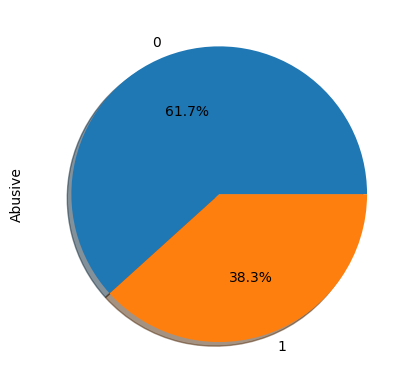

In [5]:
#Grafik yang menampilkan perbandingan presentasi tweets yang mengandung Abusive
data_tweets['Abusive'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

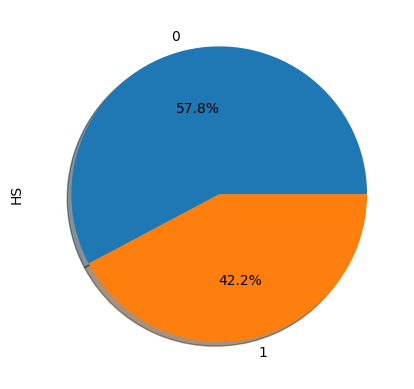

In [6]:
#Grafik yang menampilkan perbandingan presentasi tweets yang mengandung hatespeech(HS)
data_tweets['HS'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

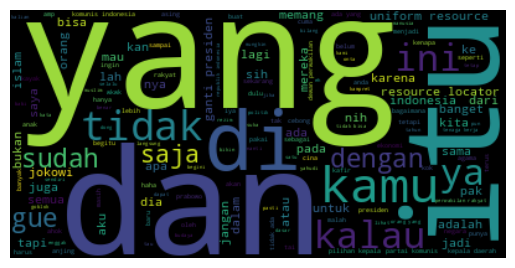

In [7]:
#import Wordcloud
from wordcloud import WordCloud

# Tampilkan data yang sering muncul dan sudah dicleansing di kolom cleansing_tweets , kemudian gabungkan semuanya menjadi satu string
text = ' '.join(str(tweet)for tweet in data_tweets['cleansing_tweets'])

# Buat wordcloud
wordcloud = WordCloud().generate(text)

# Tampilkan plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

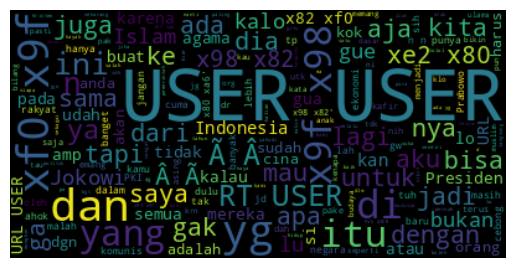

In [8]:
# Tampilkan data yang sering muncul dan belum dicleansing di kolom 'Tweet', kemudian gabungkan semuanya menjadi satu string
text = ' '.join(str(tweet)for tweet in data_tweets['Tweet'])

# Buat wordcloud
wordcloud = WordCloud().generate(text)

# Tampilkan plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()